# Analizar Resultado

In [30]:
import pickle

output_dir2='./output/experimento1/'
output_dir='./output/experimento1/'
output_orig_dir='./output/experimento1/' #output original del modelo preentrenado
#output_orig_dir='./output_externo/PassGAN_27-02-2023/'
#output_dir='./output_externo/GNPassGAN_27-02-2023/' #output original del modelo preentrenado

with open(output_dir+'log.pkl', 'rb') as f:
    data=pickle.load(f)

with open(output_orig_dir+'log.pkl', 'rb') as f:
    data_orig=pickle.load(f)

with open(output_dir2+'log.pkl', 'rb') as f:
    data2=pickle.load(f)

In [31]:
!ls {output_dir}

charmap.pickle        js1.jpg               log.pkl
charmap_inv.pickle    js2.jpg               time.jpg
checkpoints           js3.jpg               train_critic_cost.jpg
evaluacion            js4.jpg               train_gen_cost.jpg


In [32]:
print(data.keys())

dict_keys(['time', 'train critic cost', 'train gen cost', 'js1', 'js2', 'js3', 'js4'])


In [47]:
import pandas as pd
def parser_to_df(data):
    df=pd.DataFrame.from_dict(data)
    
    #Añadir indice para plotear las iteraciones
    df = df.reset_index()
    df=df.rename(columns={'index': 'iteracion'})

    #Formatear a float
    df['train critic cost']=df['train critic cost'].astype(float)
    df['train gen cost']=df['train gen cost'].astype(float)

    #Quitar nulos para ploter js1,js2,..
    df_filter=df.dropna()

    return df, df_filter

In [48]:
df, df_filter=parser_to_df(data)
df_orig, df_filter_orig=parser_to_df(data_orig)
df2, df2_filter=parser_to_df(data2)
df.describe()

,iteracion,time,train critic cost,train gen cost,js1,js2,js3,js4
count,23001.000000,23001.000000,23001.000000,23001.000000,230.000000,230.000000,230.000000,230.000000
mean,11500.000000,0.290013,1.027248,0.916130,0.015741,0.083826,0.238534,0.477473
std,6639.961107,0.038909,0.047955,0.046831,0.011212,0.040616,0.067635,0.068225
min,0.000000,0.251048,0.869152,0.794137,0.006553,0.045681,0.178628,0.418550
25%,5750.000000,0.268850,1.006819,0.885307,0.009994,0.057539,0.193032,0.435939
50%,11500.000000,0.274231,1.041561,0.907251,0.012042,0.069236,0.212338,0.450964
75%,17250.000000,0.284359,1.060165,0.936180,0.015587,0.095938,0.265202,0.495402
max,23000.000000,1.870657,1.142798,1.100070,0.072741,0.259756,0.543004,0.834243


In [35]:

df_orig.describe()

,iteracion,time,train critic cost,train gen cost,js1,js2,js3,js4
count,23001.000000,23001.000000,23001.000000,23001.000000,230.000000,230.000000,230.000000,230.000000
mean,11500.000000,0.290013,1.027248,0.916130,0.015741,0.083826,0.238534,0.477473
std,6639.961107,0.038909,0.047955,0.046831,0.011212,0.040616,0.067635,0.068225
min,0.000000,0.251048,0.869152,0.794137,0.006553,0.045681,0.178628,0.418550
25%,5750.000000,0.268850,1.006819,0.885307,0.009994,0.057539,0.193032,0.435939
50%,11500.000000,0.274231,1.041561,0.907251,0.012042,0.069236,0.212338,0.450964
75%,17250.000000,0.284359,1.060165,0.936180,0.015587,0.095938,0.265202,0.495402
max,23000.000000,1.870657,1.142798,1.100070,0.072741,0.259756,0.543004,0.834243


## Análisis del modelo preentrendaodo de GNPassGAN

In [36]:

import matplotlib.pyplot as plt

def plot_variable(df,df_orig,mesure_col,yaxis_limit=False,xaxis_limit=False,yaxis_max=0):
    fig, axs = plt.subplots(2)
    fig.set_dpi(500)
    plt.rcParams.update({'font.size': 5})
    plt.rc('axes', titlesize=5)     # fontsize of the axes title
    plt.rc('axes', labelsize=5)    # fontsize of the x and y labels

    axs[0].plot(df['iteracion'], df[mesure_col])
    axs[0].set_title(f"{mesure_col.title()} del modelo {output_dir.split('/')[-2]}")
    
    axs[1].plot(df_orig['iteracion'], df_orig[mesure_col])
    axs[1].set_title(f"{mesure_col.title()} del modelo {output_orig_dir.split('/')[-2]}")

    if yaxis_limit:
        #axs[0].set_ylim([1, 2.5])
        if yaxis_max==0:
            axs[0].set_ylim([0, 2])
            axs[1].set_ylim([0, 2])
        else:
            axs[0].set_ylim([0,yaxis_max])
            axs[1].set_ylim([0,yaxis_max])
    if xaxis_limit:
        axs[0].set_xlim([0, 20000])
        axs[1].set_xlim([0, 20000])


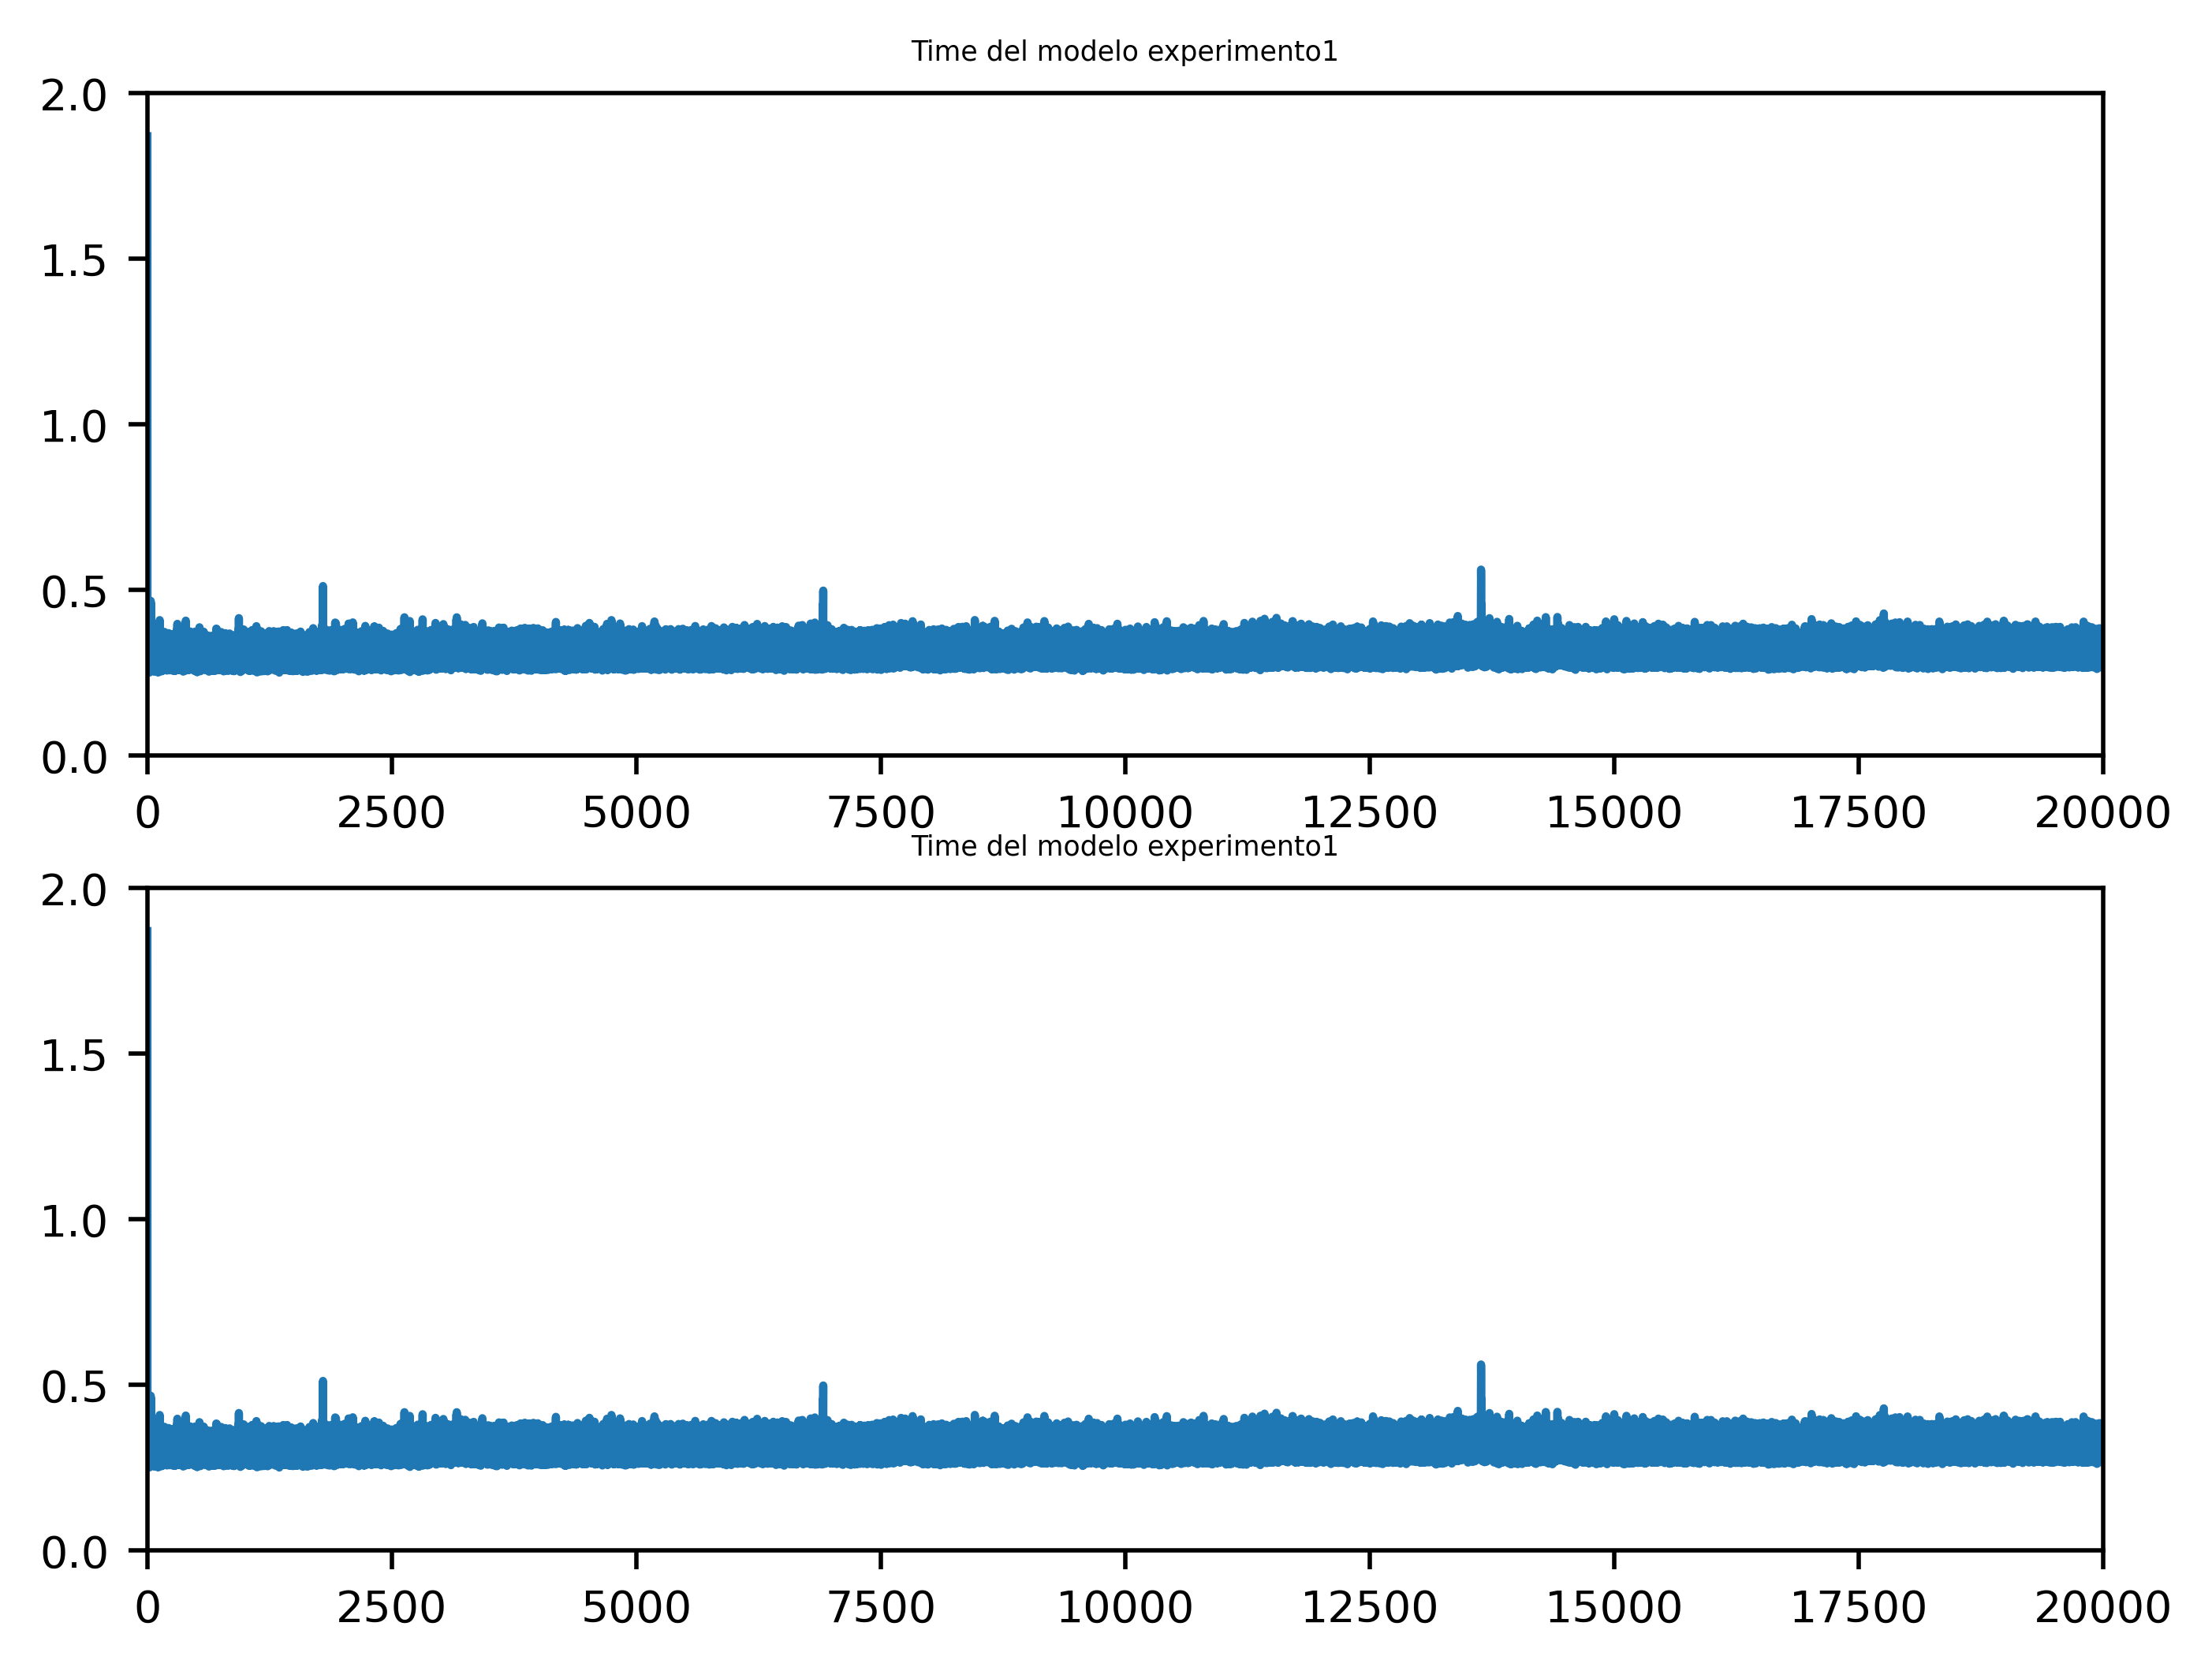

In [37]:
plot_variable(df,df_orig,mesure_col='time',yaxis_limit=True,xaxis_limit=True)

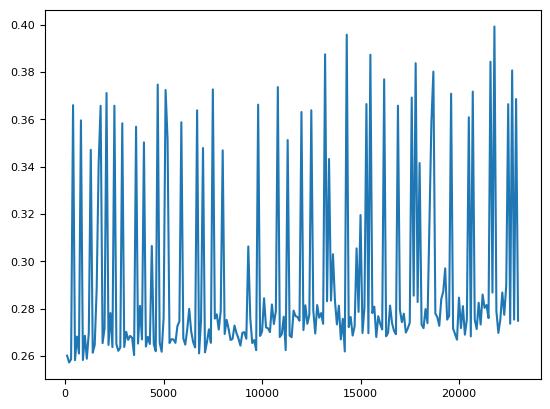

In [38]:
#plt.ylim(ymax=2.1, ymin=1)
plt.plot(df_filter['iteracion'],df_filter['time'])

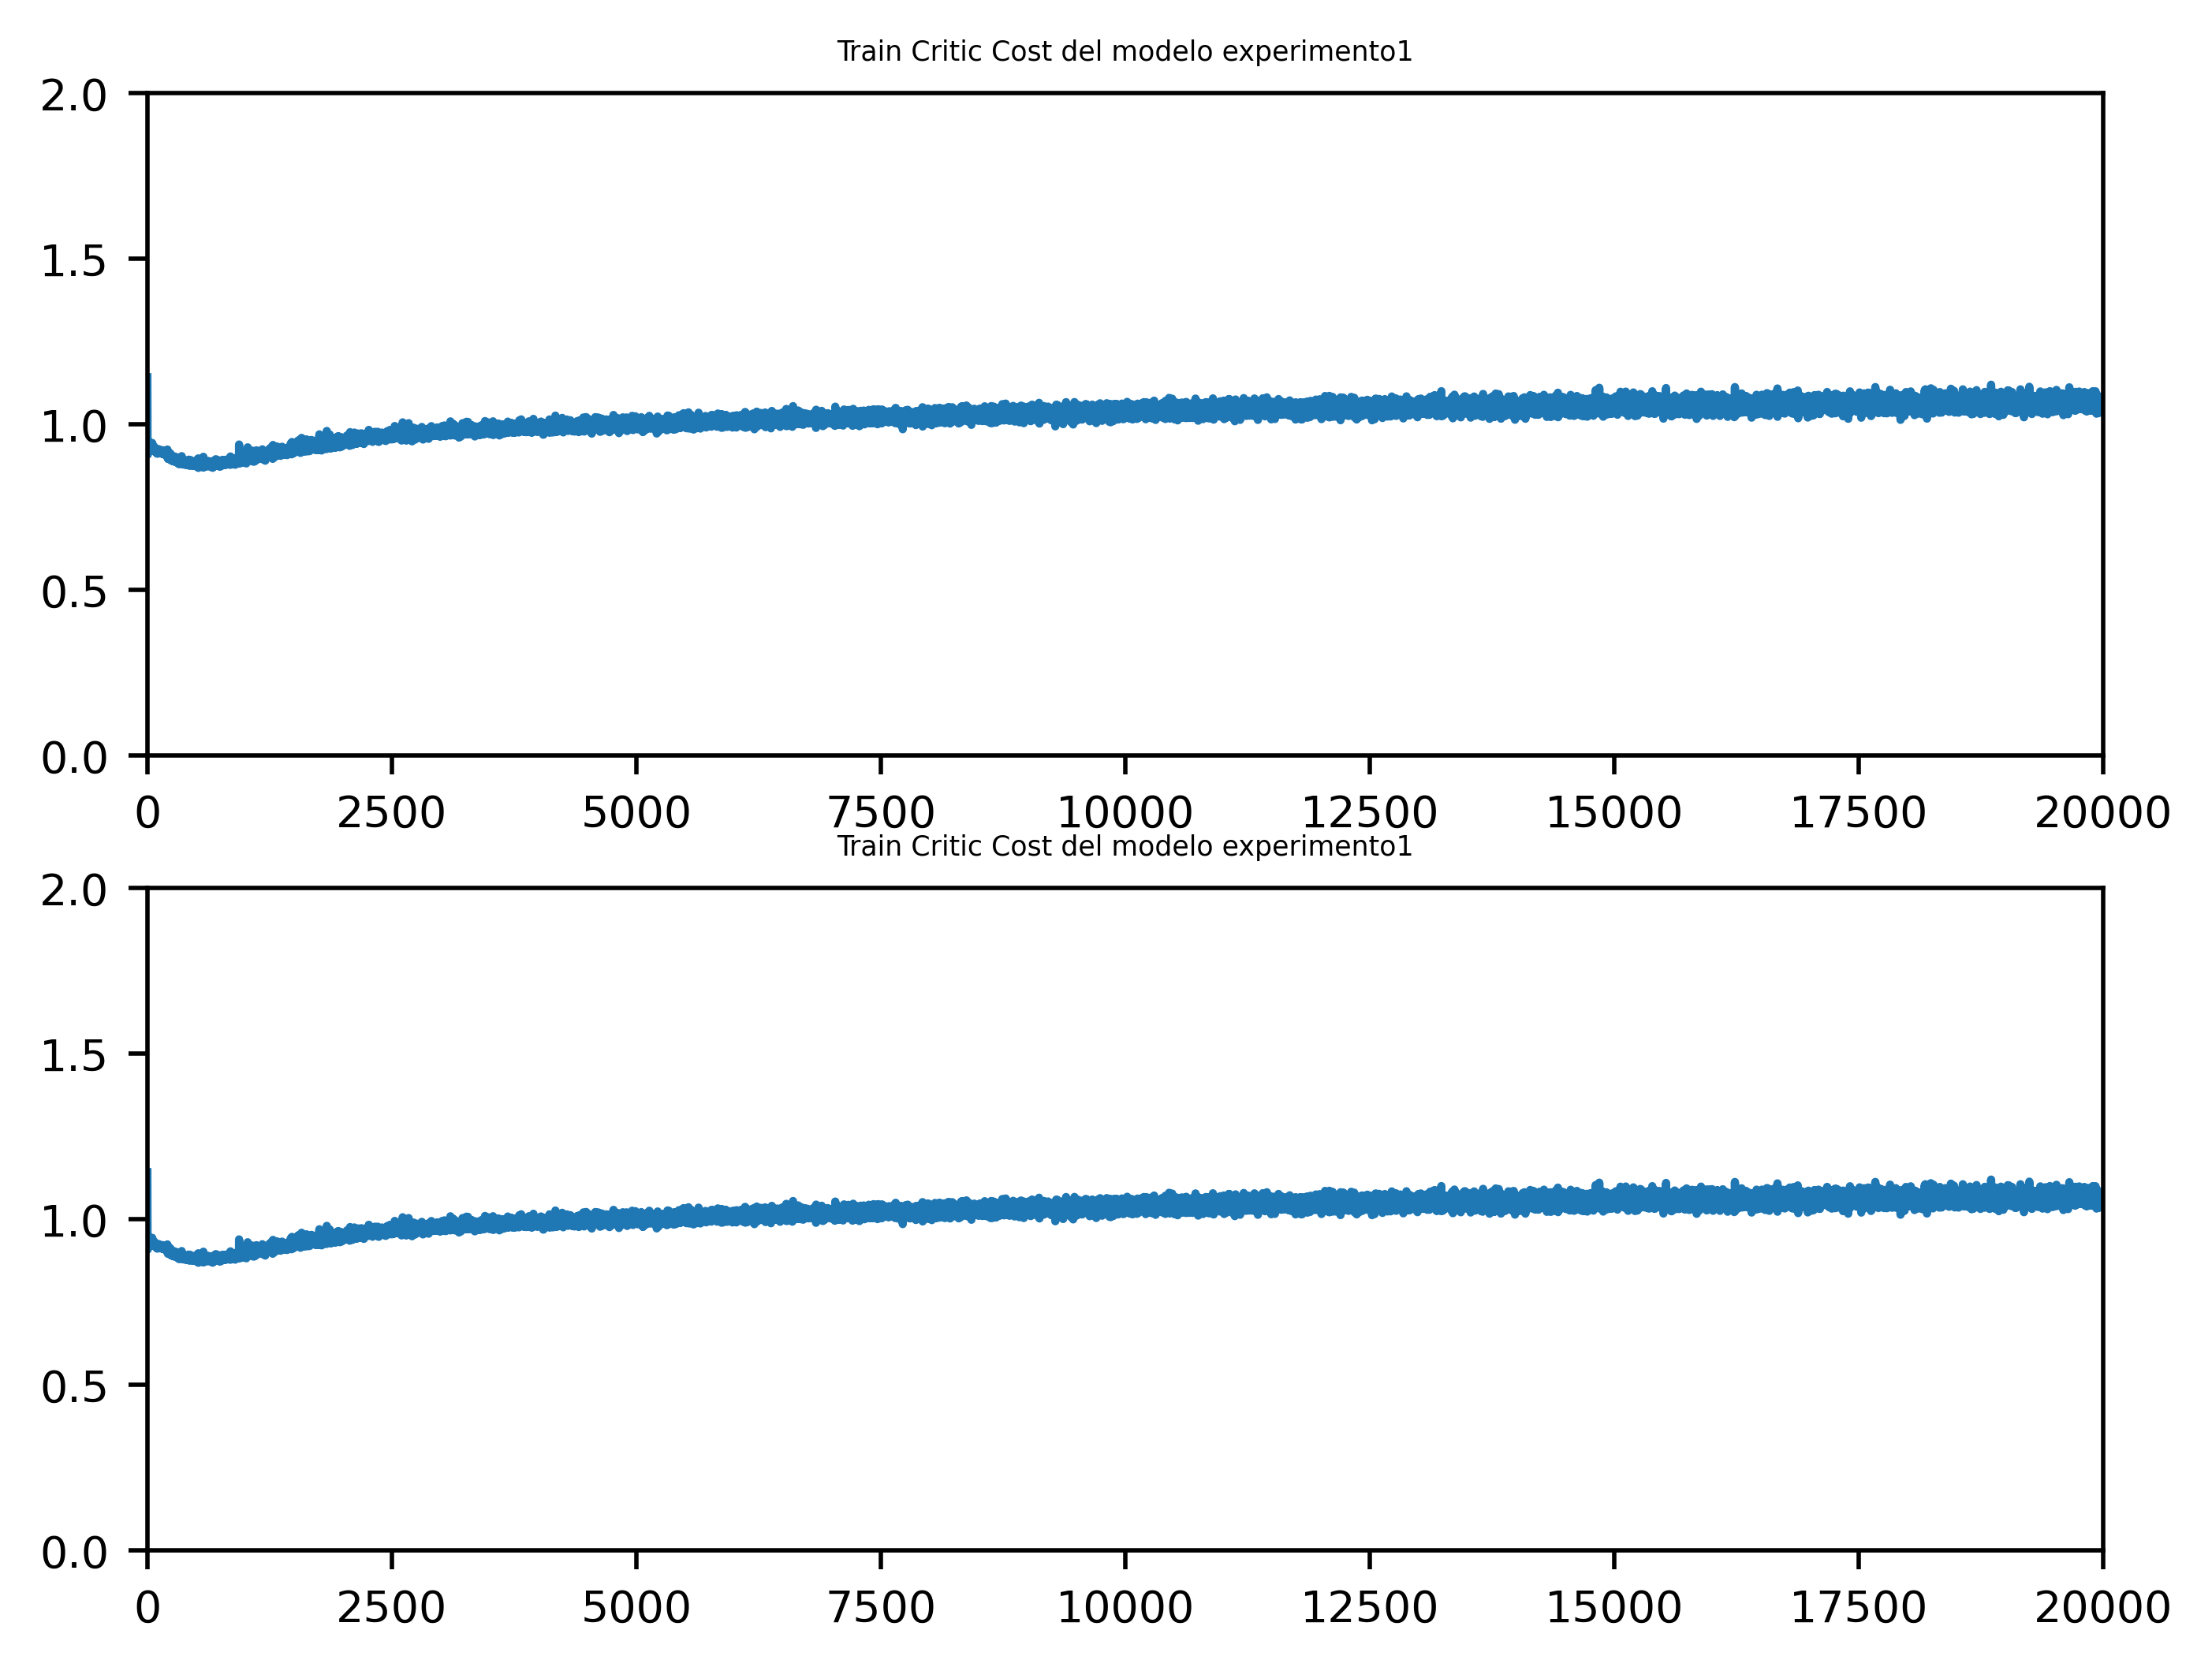

In [39]:
#df.plot('index','train critic cost')
plot_variable(df,df_orig,mesure_col='train critic cost',yaxis_limit=True,xaxis_limit=True,yaxis_max=2)

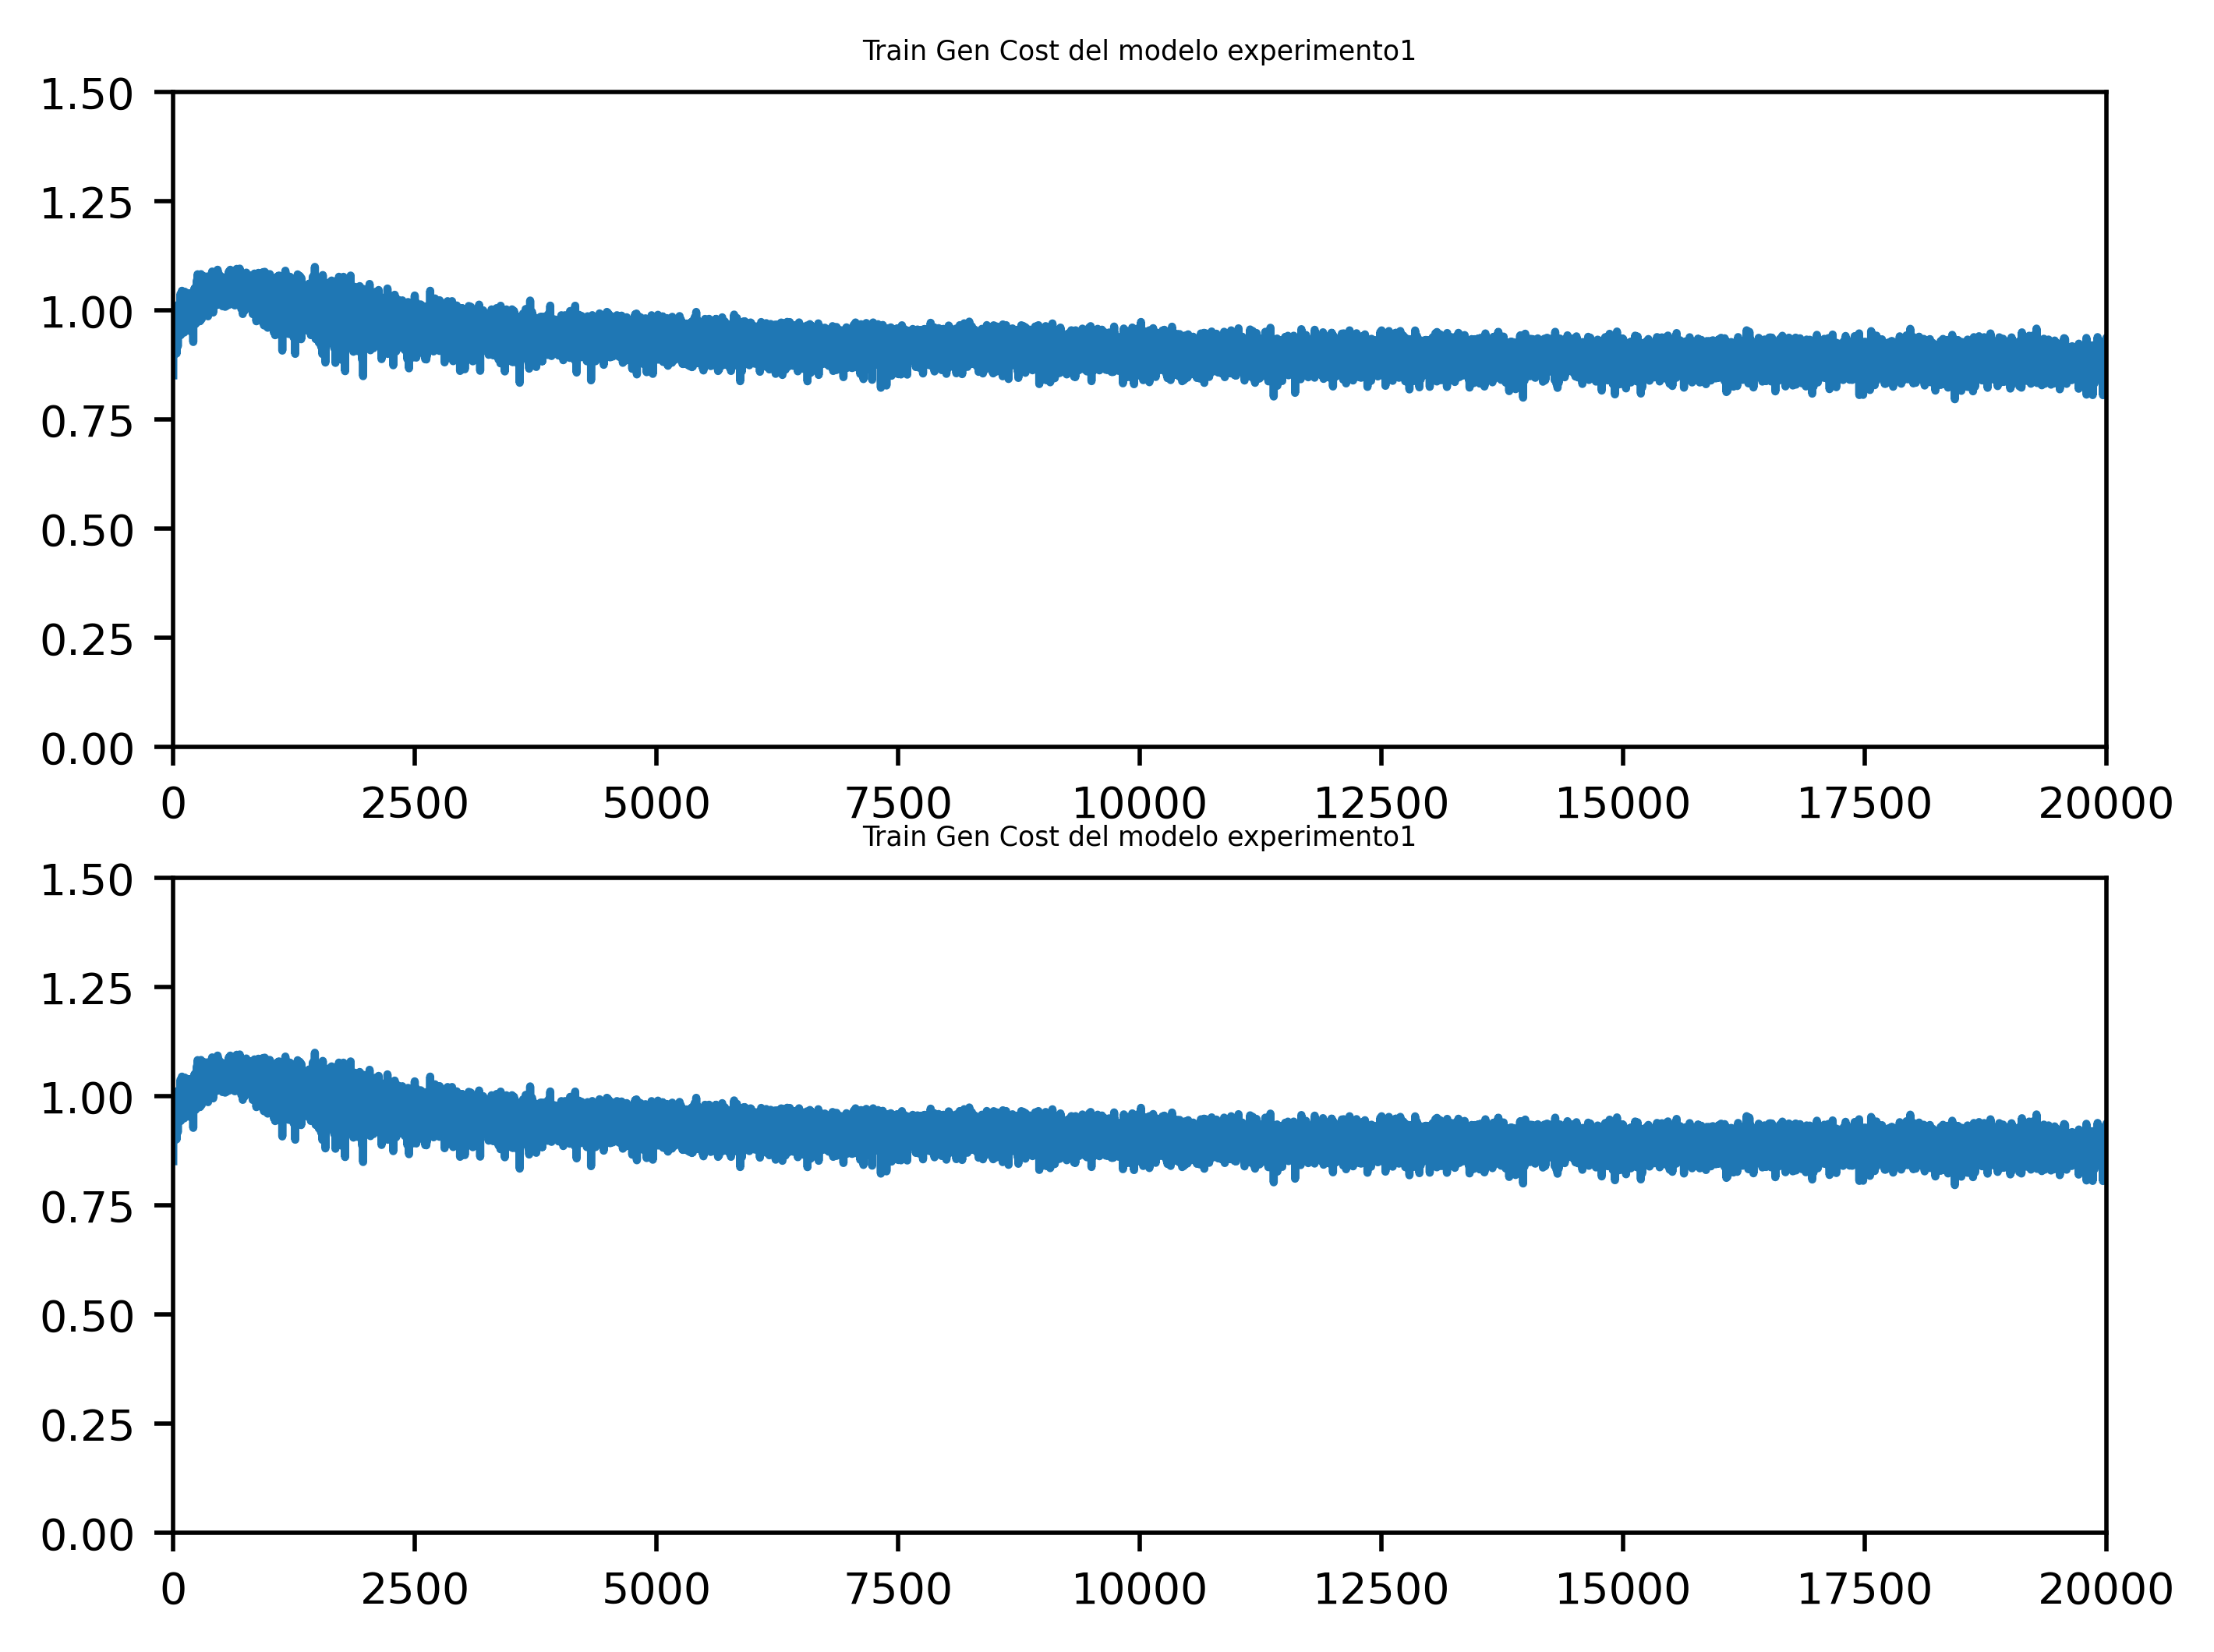

In [40]:
#df.plot('index','train gen cost')
plot_variable(df,df_orig,mesure_col='train gen cost',yaxis_limit=True,yaxis_max=1.5,xaxis_limit=True)

In [41]:
def plot_js(df_filter,xaxis_limit=False,global_titel=""):
    fig, axs = plt.subplots(2, 2)
    fig.suptitle(global_titel, fontsize=7)
    fig.set_dpi(500)
    fig.tight_layout()

    plt.rcParams.update({'font.size': 22})
    plt.rc('axes', titlesize=8)     # fontsize of the axes title
    
    plt.rc('axes', labelsize=5)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=5)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=5)    # fontsize of the tick labels
    
    plt.rc('font', size=10)          # controls default text sizes
    
    i=0
    j=0
    for col in ['js1','js2','js3','js4']:#df.columns:
        if col!='index':
            axs[i, j].plot(df_filter['iteracion'], df_filter[col])
            axs[i, j].set_title(col)
            if j==0:
                axs[i, j].set_ylabel('Divergencia de Jensen-Shannon')
            if i==1:
                axs[i, j].set_xlabel('nº iters')
            
            if xaxis_limit:
                axs[i, j].set_xlim([0, 20000])
                
            if j:
                j=0
                i=i+1
            else:
                j=1

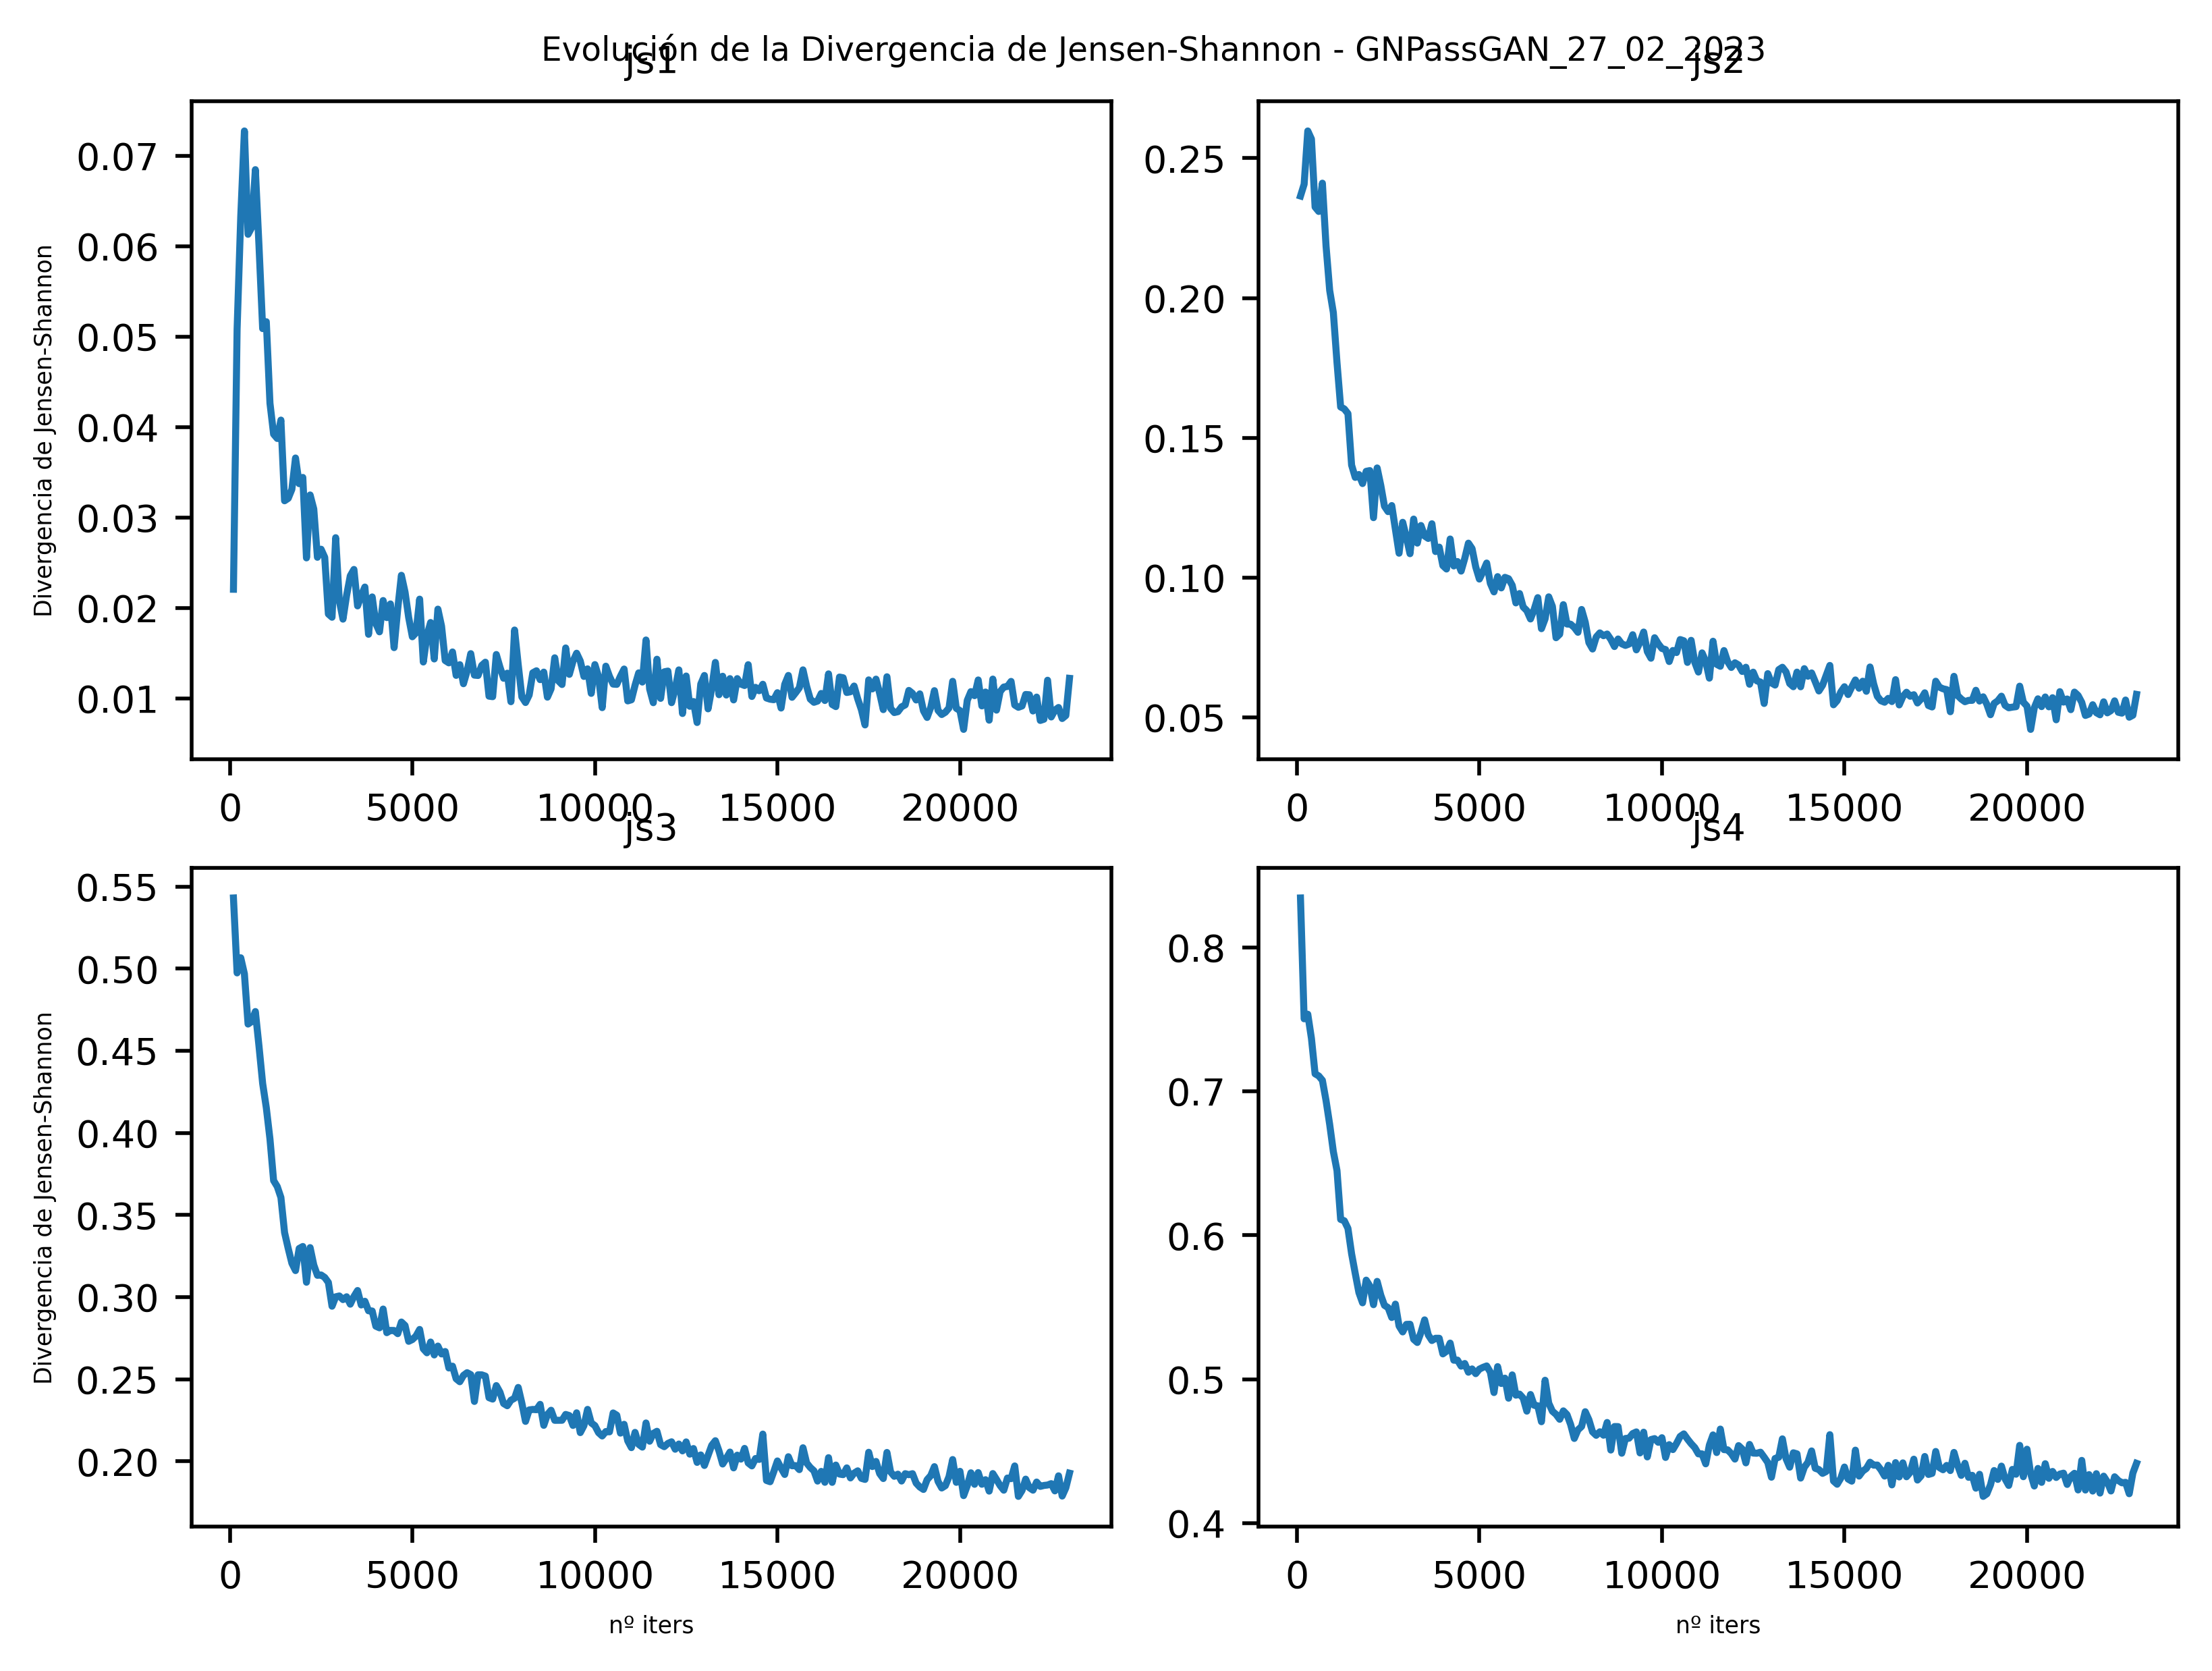

In [42]:
plot_js(df_filter,global_titel="Evolución de la Divergencia de Jensen-Shannon - GNPassGAN_27_02_2023")

Este código define una función llamada js_with que calcula la divergencia de Jensen-Shannon entre dos modelos de lenguaje estadístico (o n-gramas) representados por self y p.

La divergencia de Jensen-Shannon es una medida de similitud entre dos distribuciones de probabilidad. En el contexto de los modelos de lenguaje, esta medida se utiliza para comparar la similitud entre las distribuciones de probabilidad de los n-gramas (combinaciones de n palabras consecutivas) generadas por dos modelos de lenguaje diferentes.

La función js_with calcula esta medida utilizando los métodos log_likelihood y unique_ngrams que se espera que estén definidos en self y p. Luego, la función devuelve la mitad de la suma de las divergencias de Jensen-Shannon calculadas para ambas direcciones normalizada por el logaritmo base 2.

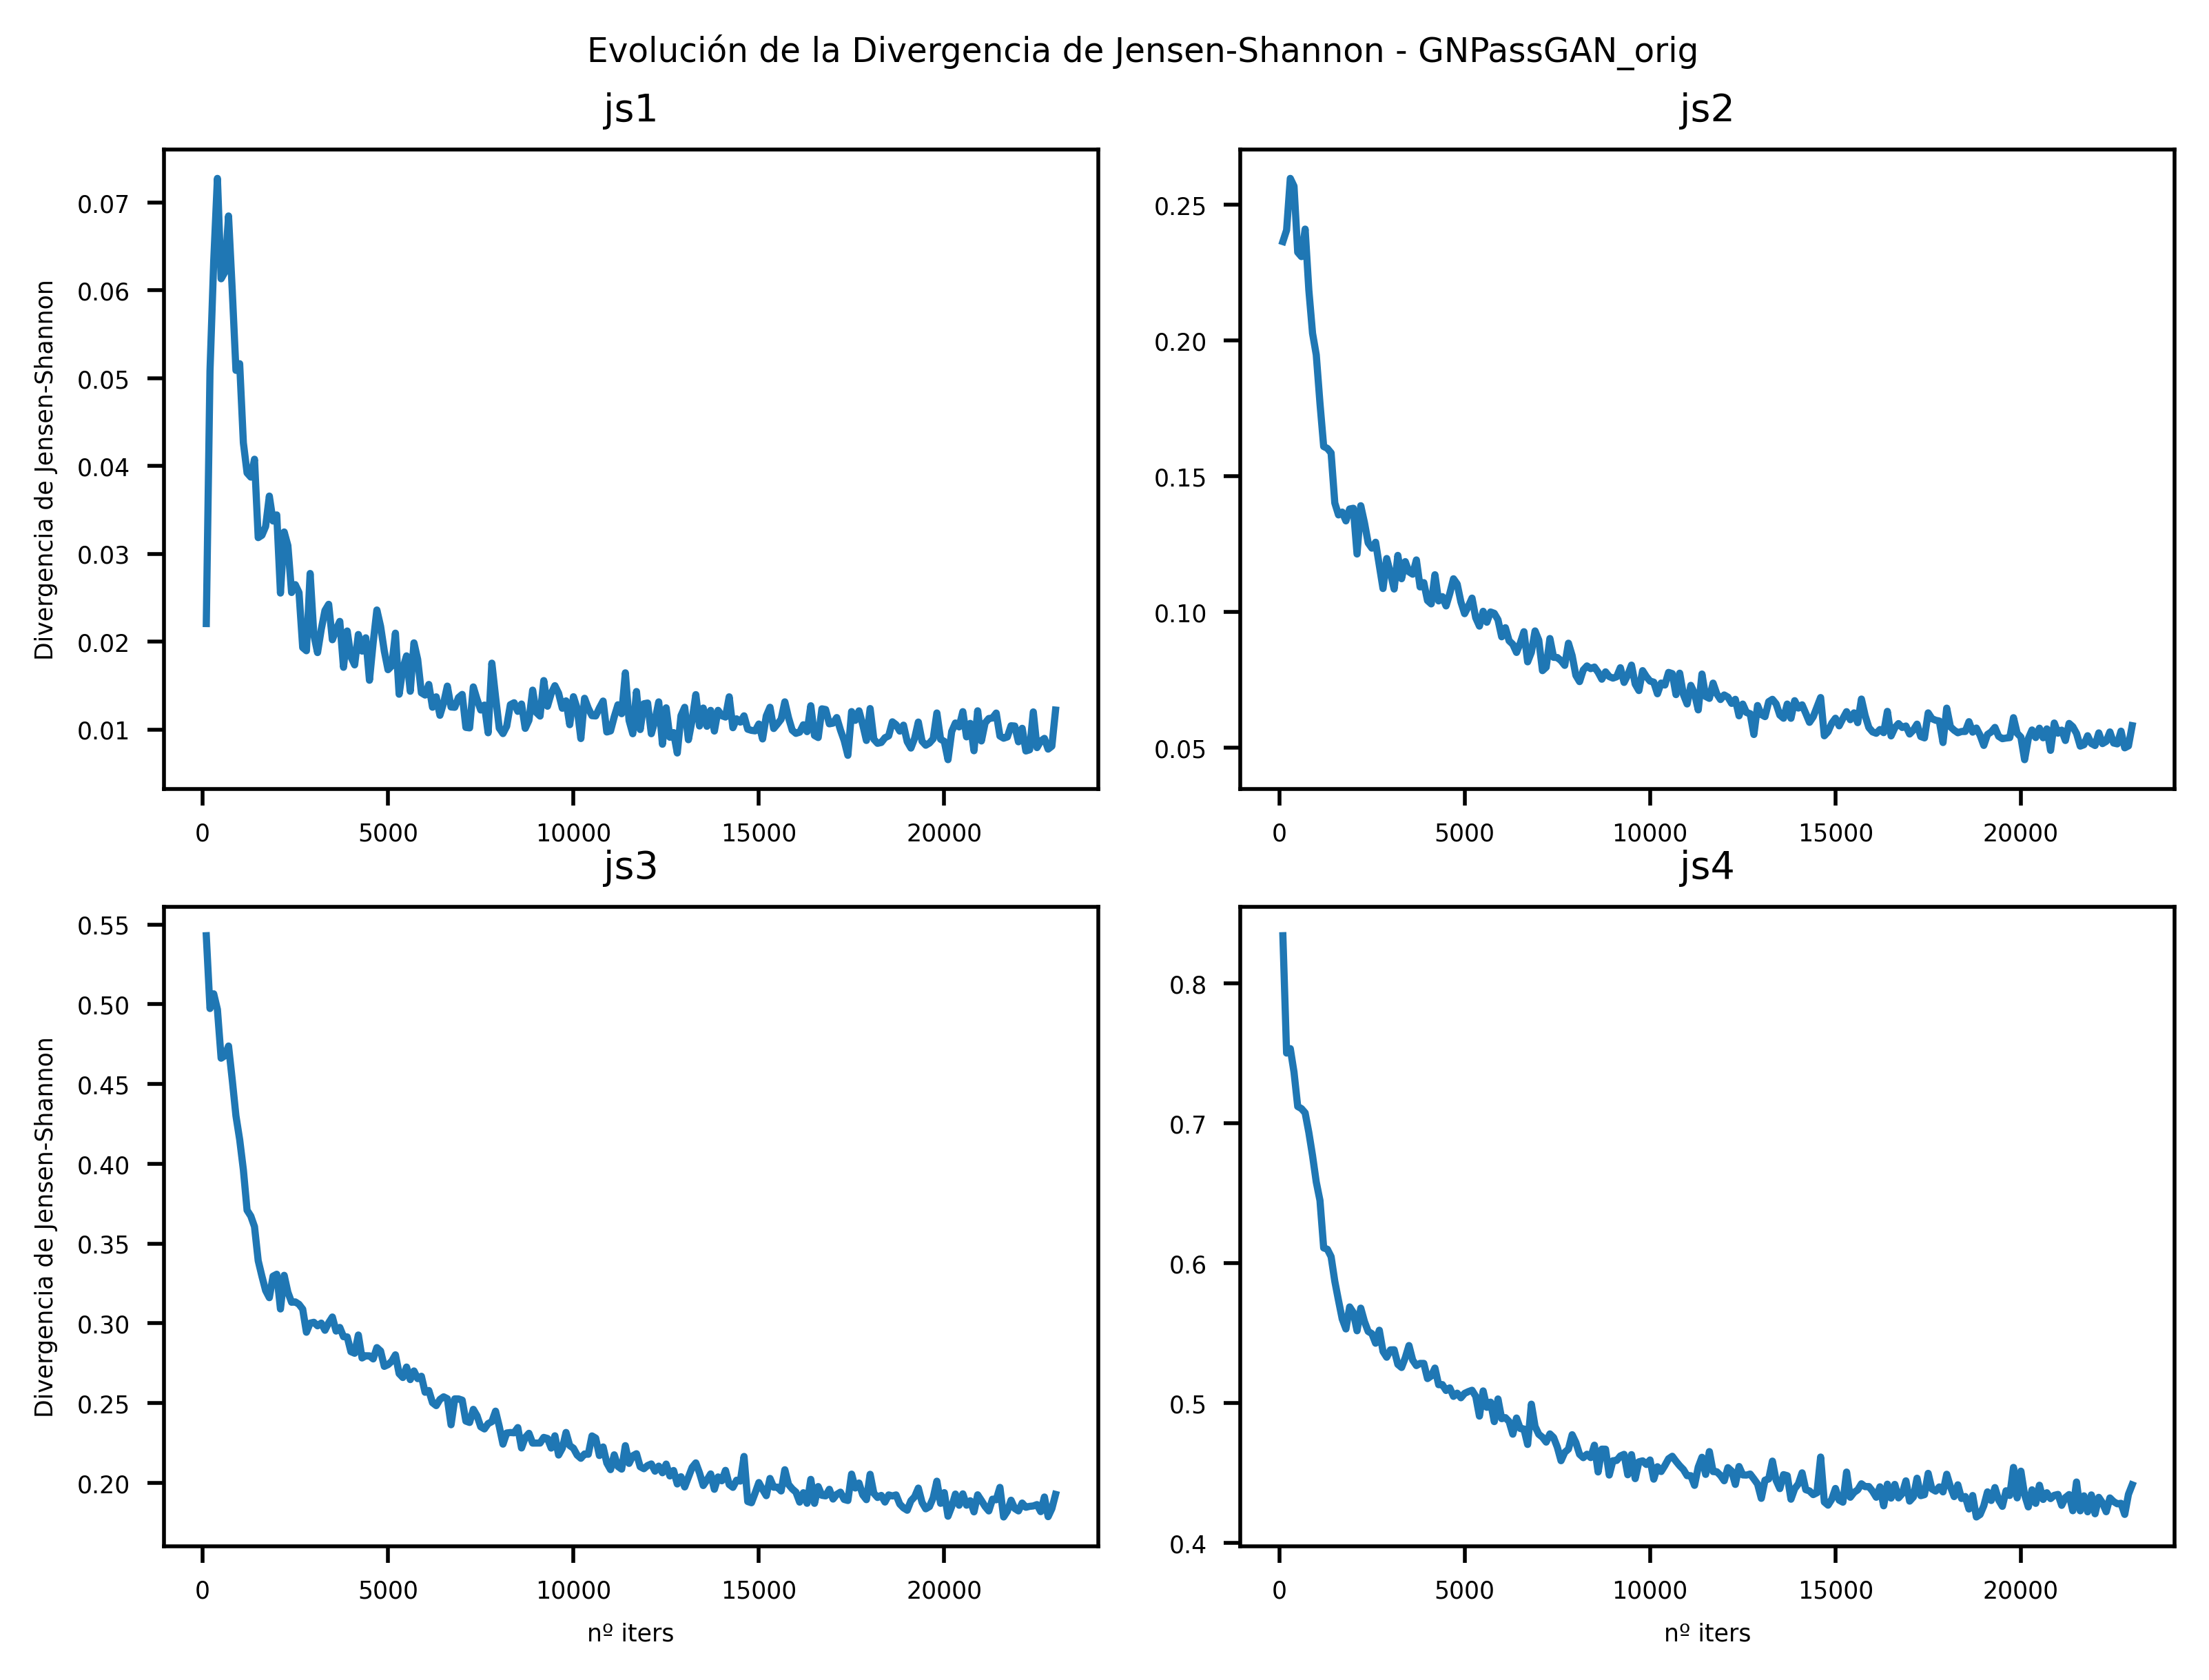

In [43]:
plot_js(df_filter_orig,global_titel="Evolución de la Divergencia de Jensen-Shannon - GNPassGAN_orig")
#plot_js(df_filter_orig,xaxis_limit=True)

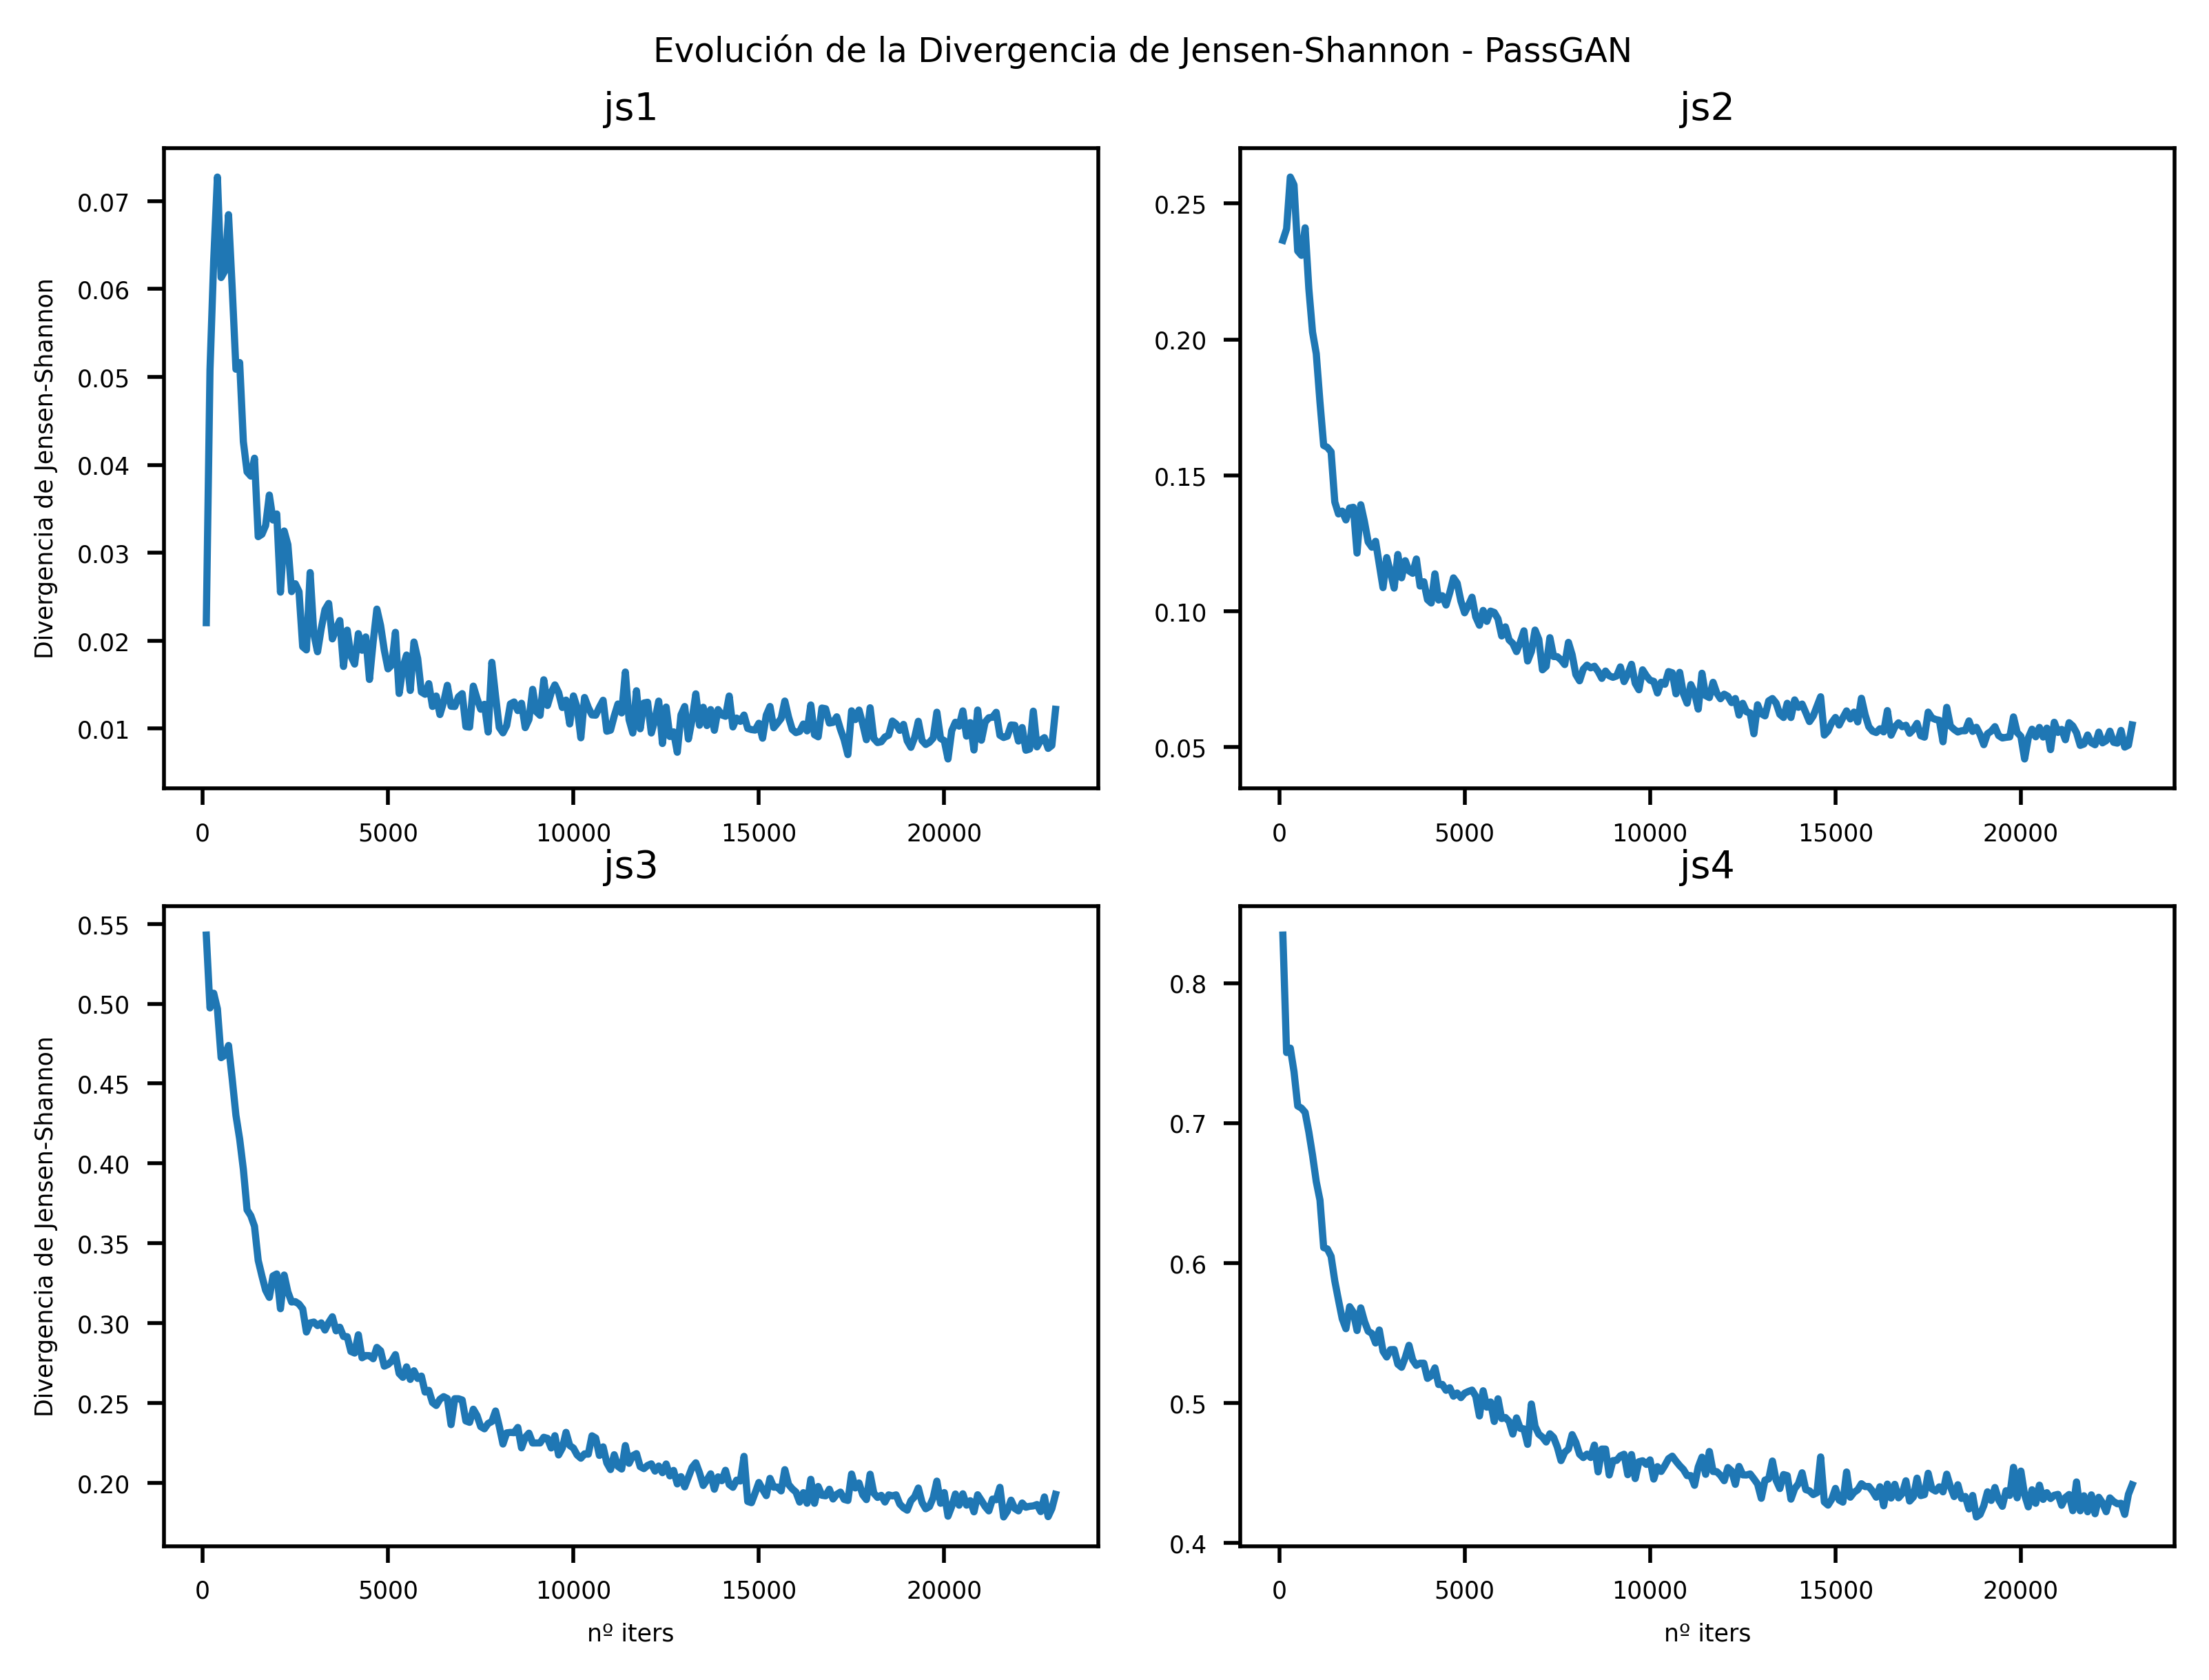

In [44]:
plot_js(df2_filter,global_titel="Evolución de la Divergencia de Jensen-Shannon - PassGAN")
#plot_js(df_filter_orig,xaxis_limit=True)

## Accuracy Contraseñas Generadas

#### Analizar Porcentaje de Acierto

In [45]:
import pandas as pd

#model_trained_dir='./output_externo/GNPassGAN_27-02-2023'
model_trained_dir='./output/experimento1'
#model_trained_dir='./output_externo/PassGAN_27-02-2023'
#model_trained_dir='./output/GNPassGAN_orig'

def leer_accuracy(model_trained_dir):
    df_accuracy=pd.read_csv(model_trained_dir +"/evaluacion/report.csv")
    name_filter=df_accuracy.path_generated.str.split('/').str[-1].str.replace('len100000000_','').str.replace("len100000000","")
    df_accuracy['seed']=name_filter.str.split('_').str[-1].str.replace(".txt","")
    df_accuracy['n_train_iter']=name_filter.str.split('_').str[-2].str.replace("train","")
    
    return df_accuracy

df_accuracy=leer_accuracy(model_trained_dir)

/var/folders/66/bpp5grj11s325w3yk6d7gz380000gn/T/ipykernel_92566/575519880.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df_accuracy['seed']=name_filter.str.split('_').str[-1].str.replace(".txt","")


In [46]:
df_accuracy['seed']=name_filter.str.split('_').str[-1].str.replace(".txt","")
df_accuracy.head()

NameError: name 'name_filter' is not defined

In [ ]:
def set_plt_text_size():
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 22

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_accuracy(df_accuracy,title,logy=False):

    set_plt_text_size()
    
    #fig=sns.lineplot(x='n_passwords', y='guessing accuracy', hue=df_accuracy[['n_train_iter', 'seed']].apply(tuple, axis=1), data=df_accuracy, marker="o")
    fig=sns.lineplot(x='n_passwords', y='guessing accuracy', hue='n_train_iter', data=df_accuracy, marker="o")
    if logy:
        plt.yscale('log')
    plt.xscale('log')

    fig.set(title=title)
    
    # label points on the plot
    df_accuracy_label=df_accuracy[df_accuracy['n_train_iter']=='250000']
    #df_accuracy_label=df_accuracy[(df_accuracy['n_passwords']==100000000) | (df_accuracy['n_train_iter']=='250000')]
    
    for x, y in zip(df_accuracy_label['n_passwords'], df_accuracy_label['guessing accuracy']):
        # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
        plt.text(x = x, # x-coordinate position of data label 
                y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
                s = '{:.4f}%'.format(y), # data label, formatted to ignore decimals
                color = 'black',
                horizontalalignment='right') # set colour of line
    plt.show()


/Users/alejandrorodriguez/Library/Python/3.8/lib/python/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


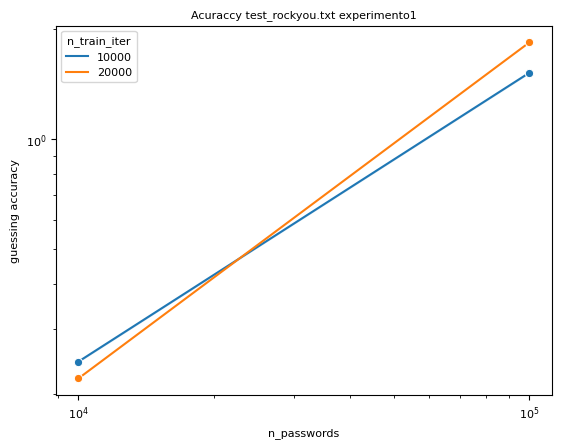

In [ ]:
model_name=model_trained_dir.split('/')[-1]
title=f'Acuraccy test_rockyou.txt {model_name}'
df_accuracy['seed']=''
plot_accuracy(df_accuracy[df_accuracy['seed']==''],title,logy=True)

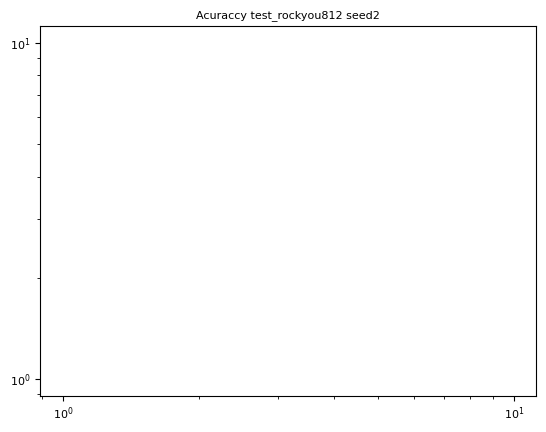

In [ ]:
title='Acuraccy test_rockyou812 seed2'
plot_accuracy(df_accuracy[df_accuracy['seed']=='seed2'],title,logy=True)

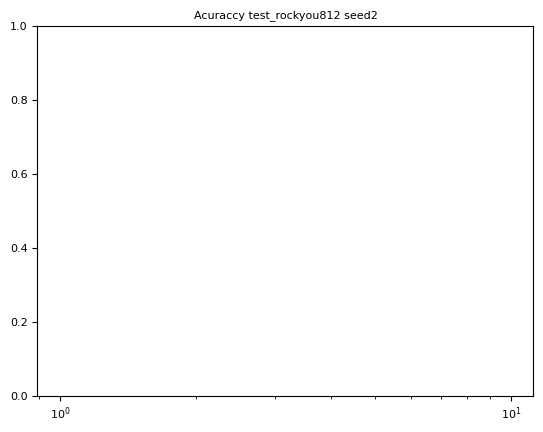

In [ ]:
title='Acuraccy test_rockyou812 seed2'
plot_accuracy(df_accuracy[df_accuracy['seed']=='seed2'],title)

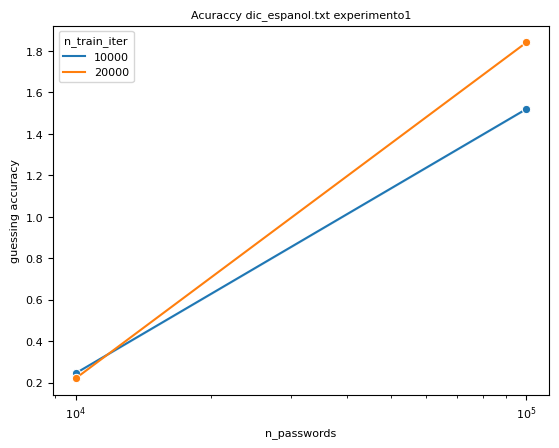

In [ ]:
model_name=model_trained_dir.split('/')[-1]
title=f'Acuraccy dic_espanol.txt {model_name}'
plot_accuracy(df_accuracy[df_accuracy['seed']==''],title)

#### Analizar Porcentaje de Contraseñas Únicas

LLama la atención que con 200.000 iteraciones el número de ocntraseñas únicas se reduce. El máximo con 10^8 iteraciones se consigue para 

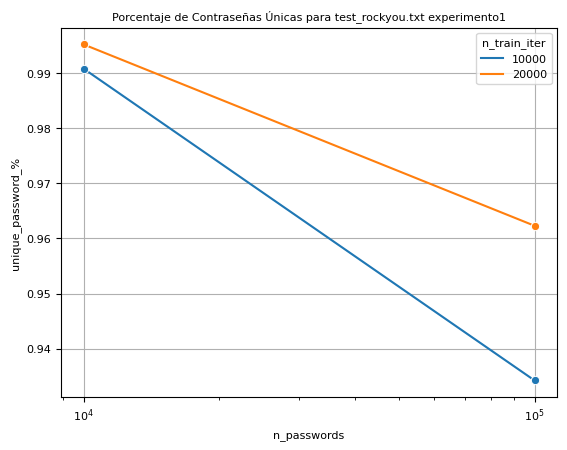

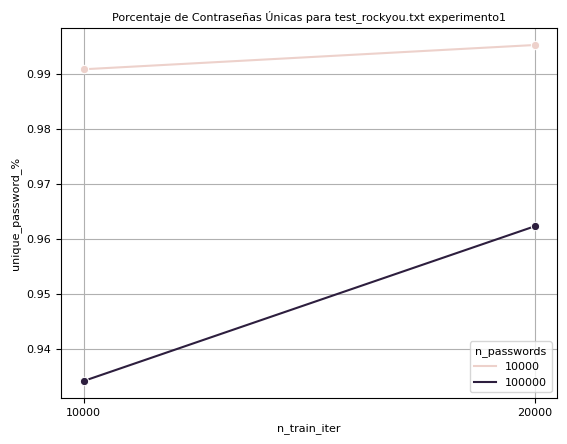

In [ ]:
def plot_unique_pswords(df_accuracy,model_name=""):
    df_accuracy['unique_password_%']=df_accuracy['n_unique_generated_passwords']/df_accuracy['n_passwords']
    fig=sns.lineplot(x='n_passwords', y='unique_password_%', hue='n_train_iter', data=df_accuracy,marker="o")
    model_name=model_trained_dir.split('/')[-1]
    fig.set(title=f'Porcentaje de Contraseñas Únicas para test_rockyou.txt {model_name}')
    plt.xscale('log')
    plt.grid()
    plt.show()

    fig=sns.lineplot(x='n_train_iter', y='unique_password_%', hue='n_passwords', data=df_accuracy,marker="o")
    fig.set(title=f'Porcentaje de Contraseñas Únicas para test_rockyou.txt {model_name}')
    df_accuracy_label=df_accuracy[(df_accuracy['n_passwords']==10**8)]
    for x, y in zip(df_accuracy_label['n_train_iter'], df_accuracy_label['unique_password_%']):
        # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
        plt.text(x = x, # x-coordinate position of data label 
                y = y+0.01, # y-coordinate position of data label, adjusted to be 150 below the data point
                s = '{:.3f}%'.format(y), # data label, formatted to ignore decimals
                color = 'black') # set colour of line
    plt.grid()
    plt.show()
    
plot_unique_pswords(df_accuracy,model_name=model_name)